# Dataset for search assessment
Build on top of wikipedia pages

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
import urllib.request
import json

## Get the data

In [3]:
url = 'http://island.ricerca.di.unimi.it/~alfio/shared/inforet/wikipeople.json'
data = urllib.request.urlopen(url).read()

In [14]:
D = json.loads(data)
entities = set([r['entity'] for r in D])

In [16]:
len(entities)

33

In [5]:
D[0]

{'docid': 'Q868_1',
 'entity': 'Q868',
 'target': 'Aristotle (ancient Greek philosopher)',
 'wikipage': 'https://en.wikipedia.org/wiki/Aristotle',
 'query': 'Aristotle philosopher',
 'document': 'Aristotle (/ærɪsˈtɒtəl/;[3] Greek: Ἀριστοτέλης Aristotélēs, pronounced\xa0[aristotélɛːs]; 384–322\xa0BC) was a Greek philosopher and polymath during the Classical period in Ancient Greece. Taught by Plato, he was the founder of the Lyceum, the Peripatetic school of philosophy, and the Aristotelian tradition. His writings cover many subjects including physics, biology, zoology, metaphysics, logic, ethics, aesthetics, poetry, theatre, music, rhetoric, psychology, linguistics, economics, politics, and government. Aristotle provided a complex synthesis of the various philosophies existing prior to him. It was above all from his teachings that the West inherited its intellectual lexicon, as well as problems and methods of inquiry. As a result, his philosophy has exerted a unique influence on almost

## Example of preparing data

In [7]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

### Documents

In [8]:
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
documents = vectorizer.fit_transform([x['document'] for x in D])

In [9]:
documents.shape

(1139, 15716)

## Show

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
v_docs = pca.fit_transform(documents.toarray())

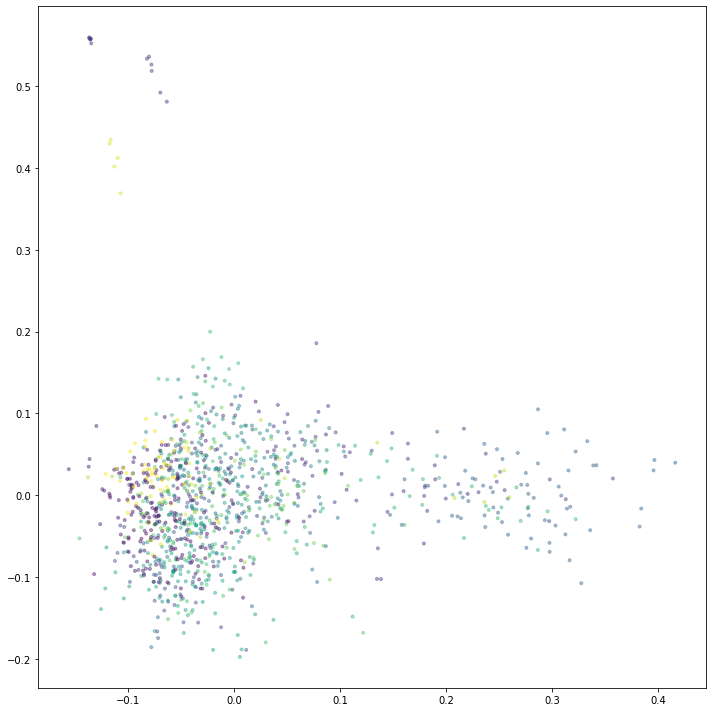

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(v_docs[:,0], v_docs[:,1], marker='.', alpha=0.4, c=y_pred)
plt.tight_layout()
plt.show()

## Clustering

In [18]:
from sklearn.cluster import KMeans

In [21]:
k = KMeans(n_clusters=33)

In [26]:
y_pred = k.fit_predict(documents)

In [27]:
y = [r['entity'] for r in D]

In [29]:
y_pred

array([ 7,  7,  7, ..., 16,  3, 16], dtype=int32)

In [30]:
from sklearn.metrics import adjusted_rand_score

In [31]:
adjusted_rand_score(y, y_pred)

0.3576889275952587

## Clustering label

In [33]:
from collections import defaultdict

In [34]:
C = defaultdict(lambda: [])
for i, p in enumerate(y_pred):
    C[p].append(D[i]['document'])

In [37]:
clusters = list(C.keys())
docs = [" ".join(C[c]) for c in clusters]

In [39]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize)

In [40]:
X = tfidf.fit_transform(docs)

In [41]:
X.shape

(33, 15723)

In [55]:
cid = clusters.index(19)

In [56]:
words = [(i, w) for i, w in sorted(enumerate(X[cid].toarray()[0]), key=lambda x: -x[1])]

In [57]:
features = tfidf.get_feature_names()
for word, relevance in words[:50]:
    print(features[word], relevance)

the 0.5073365794918789
, 0.38311937020776
. 0.28262904359588853
of 0.2442473216260765
[ 0.2378838629738687
] 0.2378838629738687
churchill 0.23405963295895407
to 0.19614143322649613
in 0.19609570679122143
and 0.1800451685129364
he 0.14941318428835965
a 0.14096559705276415
was 0.12433204922803412
as 0.08437782410498323
his 0.08412068146995236
for 0.08289751140138704
that 0.06809438436542507
's 0.060222661014185774
government 0.05789653295587135
on 0.05749458923839727
`` 0.05107491503734743
british 0.04909197886489546
with 0.04887040085263769
labour 0.04885375099995477
war 0.04867815571780238
'' 0.04650104204892825
by 0.04168357719783802
minister 0.03413311300956842
; 0.033333646643528475
secretary 0.031037211032661372
conservative 0.027631567674412532
an 0.027443237930515035
at 0.02738578501652965
naval 0.027321298643117744
but 0.026696613880006867
it 0.026696613880006867
had 0.026518280633688305
britain 0.026006625884328234
not 0.025911419354124315
which 0.024435200426318845
chamberlain